# This project aims to predict customer churn in the banking industry.

## Data : https://www.kaggle.com/datasets/anwarsan/credit-card-bank-churn

this study indicate that the two best training methods are random forest and support vector machine : https://www.researchgate.net/publication/368911804_Customer_Churn_Prediction_in_the_Banking_Sector_Using_Machine_Learning-Based_Classification_Models
<b> so i will do data preprocessing to work for random forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE

import pickle

# Introduction to the Data

In [2]:
data = pd.read_csv("data/credit_card_churn.csv")

In [3]:
data.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


# Data Description

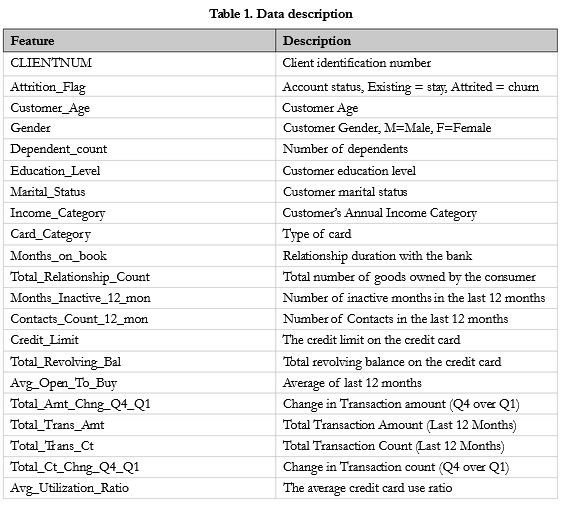

In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

# Data Preprocessing

In [5]:
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [6]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

 I will drop the client num column  because it is not important for Predicting churn of bank customer

In [7]:
data.drop(columns='CLIENTNUM',inplace=True)

In [8]:
data.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [9]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [10]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':1,'Attrited Customer':0})

In [11]:
data['Attrition_Flag'].unique()

array([1, 0], dtype=int64)

In [12]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [14]:
data.head(2).T

,0,1
Attrition_Flag,1,1
Customer_Age,45,49
Gender,M,F
Dependent_count,3,5
Education_Level,High School,Graduate
Marital_Status,Married,Single
Income_Category,$60K - $80K,Less than $40K
Card_Category,Blue,Blue
Months_on_book,39,44
Total_Relationship_Count,5,6


In [15]:
original_data = data

# Exploratory Data Analysis

In [17]:
y=data['Total_Trans_Amt']
x=data['Attrition_Flag']
#c=data['Attrition_Flag']

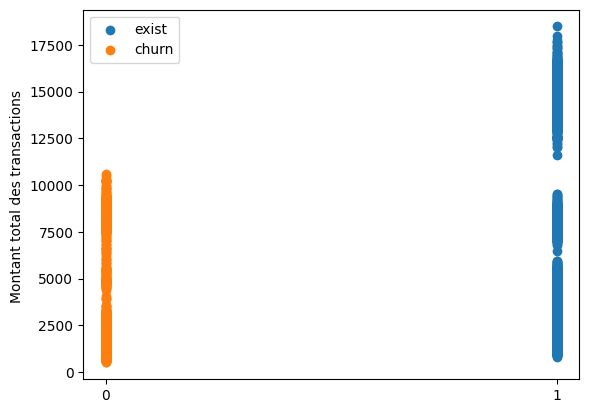

In [18]:
#plt.scatter(x=x, y=y,c=c)
plt.scatter(x[x == 1], y[x == 1], label='exist')
plt.scatter(x[x == 0], y[x == 0], label='churn')
plt.xticks([0, 1])
plt.ylabel("Montant total des transactions ")
plt.legend()
plt.show()

### Result 1 : As we can see here , people who have more than 12500 in total transaction ammount in last 12 mounths are the ones who more likely to stay

In [19]:
moyen_uti_card_reste = data[data['Attrition_Flag']==1]['Avg_Utilization_Ratio'].mean()

In [20]:
moyen_uti_card_perdu = data[data['Attrition_Flag']==0]['Avg_Utilization_Ratio'].mean()

In [21]:
print(f"La moyenne d'utilisation de la carte pour les clients restants : {moyen_uti_card_reste:.2f}")
print(f"La moyenne d'utilisation de la carte pour les clients perdus : {moyen_uti_card_perdu:.2f}")

La moyenne d'utilisation de la carte pour les clients restants : 0.30
La moyenne d'utilisation de la carte pour les clients perdus : 0.16


### Result 2 : as we can see here the attrited customers don't usually use there credit card

In [22]:
data.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [23]:
moyen_Rev_Bal_reste = data[data['Attrition_Flag']==1]['Total_Revolving_Bal'].mean()
moyen_Rev_Bal_perdu = data[data['Attrition_Flag']==0]['Total_Revolving_Bal'].mean()
print(f"La moyenne de Solde Total Renouvelable pour les clients restants : {moyen_Rev_Bal_reste:.2f}")
print(f"La moyenne de Solde Total Renouvelable pour les clients perdus : {moyen_Rev_Bal_perdu:.2f}")

La moyenne de Solde Total Renouvelable pour les clients restants : 1256.60
La moyenne de Solde Total Renouvelable pour les clients perdus : 672.82


### Result 3 : As we can see here customers that churned are more responsible credit card usage or paying off balances regularly and customers who stayed carry more dept

In [24]:
moyen_TransCt_reste = data[data['Attrition_Flag']==1]['Total_Trans_Ct'].mean()
moyen_TransCt_perdu = data[data['Attrition_Flag']==0]['Total_Trans_Ct'].mean()
print(f"La moyenne des transactions des clients restants : {moyen_TransCt_reste:.2f}")
print(f"La moyenne des transactions des clients perdus : {moyen_TransCt_perdu:.2f}")

La moyenne des transactions des clients restants : 68.67
La moyenne des transactions des clients perdus : 44.93


### Result 4 : As we can see here customers that churned did less transactions than the existed customers

In [25]:
data_work = data.copy()

# Feature engineering

### OneHotEncoding the gender column

In [26]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(data[['Gender']]).toarray()

In [27]:
ohe.categories_

[array(['F', 'M'], dtype=object)]

In [28]:
column_labels = np.array(ohe.categories_).ravel()

In [29]:
column_labels

array(['F', 'M'], dtype=object)

In [30]:
ohe_df = pd.DataFrame(transformed, columns=column_labels)

In [31]:
ohe_df.head()

,F,M
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [32]:
data = pd.concat([data, ohe_df], axis=1)

In [33]:
data.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,F,M
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0,1.0
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1.0,0.0


In [34]:
data.drop(columns = 'Gender',inplace=True)

In [35]:
data.head(2)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,F,M
0,1,45,3,High School,Married,$60K - $80K,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0,1.0
1,1,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1.0,0.0


### OneHotEncoding the Education_Level column

In [36]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

Here we have multiple education level , i will use one hot encoding because i don't want the model to misterpret those values as  they have an ordinal relashionship between them in this case of costumer churn and also we have unknown , this value have no ordinal relashionship with others

In [37]:
transformed = ohe.fit_transform(data[['Education_Level']]).toarray()
column_labels = np.array(ohe.categories_).ravel()
# Im gonna Add prefix to avoid any duplicated columns in futur (example : Marital_Status and Education_Level both have unknown value)
column_labels = [f'EducLvl_{column}' for column in column_labels]
ohe_df = pd.DataFrame(transformed, columns=column_labels)
data = pd.concat([data, ohe_df], axis=1)
data.drop(columns = 'Education_Level',inplace=True)

In [38]:
data.head(2)

,Attrition_Flag,Customer_Age,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Utilization_Ratio,F,M,EducLvl_College,EducLvl_Doctorate,EducLvl_Graduate,EducLvl_High School,EducLvl_Post-Graduate,EducLvl_Uneducated,EducLvl_Unknown
0,1,45,3,Married,$60K - $80K,Blue,39,5,1,3,...,0.061,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,49,5,Single,Less than $40K,Blue,44,6,1,2,...,0.105,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### OneHotEncoding the Marital_Status column

In [39]:
data['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [40]:
transformed = ohe.fit_transform(data[['Marital_Status']]).toarray()
column_labels = np.array(ohe.categories_).ravel()
# Add prefix to avoid any duplicated columns in futur (example : Marital_Status and Education_Level both have unknown value)
column_labels = [f'MariStat_{column}' for column in column_labels]
ohe_df = pd.DataFrame(transformed, columns=column_labels)
data = pd.concat([data, ohe_df], axis=1)
data.drop(columns = 'Marital_Status',inplace=True)

I have a problem here : the column unknown is duplicated but they represent different things so to avoid that i will just add prefix for each one

In [41]:
data.head(2)

,Attrition_Flag,Customer_Age,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,EducLvl_Doctorate,EducLvl_Graduate,EducLvl_High School,EducLvl_Post-Graduate,EducLvl_Uneducated,EducLvl_Unknown,MariStat_Divorced,MariStat_Married,MariStat_Single,MariStat_Unknown
0,1,45,3,$60K - $80K,Blue,39,5,1,3,12691.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,49,5,Less than $40K,Blue,44,6,1,2,8256.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### OneHotEncoding the Card_Category column

In [42]:
data['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [43]:
transformed = ohe.fit_transform(data[['Card_Category']]).toarray()
column_labels = np.array(ohe.categories_).ravel()
# Add prefix to avoid any duplicated columns in futur (example : Marital_Status and Education_Level both have unknown value)
column_labels = [f'Card_{column}' for column in column_labels]
ohe_df = pd.DataFrame(transformed, columns=column_labels)
data = pd.concat([data, ohe_df], axis=1)
data.drop(columns = 'Card_Category',inplace=True)

In [44]:
data.head(2)

,Attrition_Flag,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,EducLvl_Uneducated,EducLvl_Unknown,MariStat_Divorced,MariStat_Married,MariStat_Single,MariStat_Unknown,Card_Blue,Card_Gold,Card_Platinum,Card_Silver
0,1,45,3,$60K - $80K,39,5,1,3,12691.0,777,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,49,5,Less than $40K,44,6,1,2,8256.0,864,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### OneHotEncoding the Income_Category column

In [45]:
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

here I can use label encoding and its fine for the model to interpet that 60k > 40k , but as we have the unkown value so I can't really know what this person income and we can't say 60k>unkown because maybe this person earn more than 60k so for now i will do onehotencoding for now ( maybe in future i will just assume that unkown is zero, but that might mislead the model )

In [46]:
transformed = ohe.fit_transform(data[['Income_Category']]).toarray()
column_labels = np.array(ohe.categories_).ravel()
column_labels = [f'Income_{column}' for column in column_labels]
ohe_df = pd.DataFrame(transformed, columns=column_labels)
data = pd.concat([data, ohe_df], axis=1)
data.drop(columns = 'Income_Category',inplace=True)

In [47]:
data.head(2)

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Card_Blue,Card_Gold,Card_Platinum,Card_Silver,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Income_Unknown
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Months_on_book            10127 non-null  int64  
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Total_Revolving_Bal       10127 non-null  int64  
 9   Avg_Open_To_Buy           10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

Now I did a basic data preprocessing, for now I will not scale the data because i will work with random forest model that doesn't require any scaling because its tree-based model

In [49]:
data['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

# Imbalanced Data

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

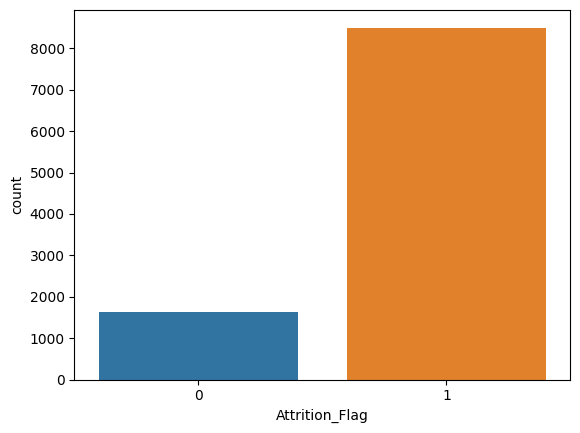

In [50]:
sns.countplot(x=data['Attrition_Flag'])

**As we can see here our  target class is imbalanced ; we have more samples of the class 'existed people' than the class 'churn people'
Now the question here is will i need to balance the data? my decision is yes!
because as business owner , i will prefere is to predict that a customer will churn even if they end up staying, rather than predicting that a customer will stay when they might churn.**

## Defining features and target 

In [51]:
X = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag']

# Data Preprocessing 2

### Handling imbalanced data with SMOTE

In [53]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [54]:
y_res.value_counts()

1    8500
0    8500
Name: Attrition_Flag, dtype: int64

so now we have both class balanced

In [55]:
X = X_res

In [56]:
y=y_res

### Split Data to train and test 

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (13600, 37)
X_test shape (3400, 37)
y_train shape (13600,)
y_test shape (3400,)


# Training the model

In [61]:
model = RandomForestClassifier(n_estimators=40,criterion='gini')

In [62]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

# Test and evaluation

In [63]:
y_pred = model.predict(X_test)

In [64]:
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

## 1/ Confusion matrix

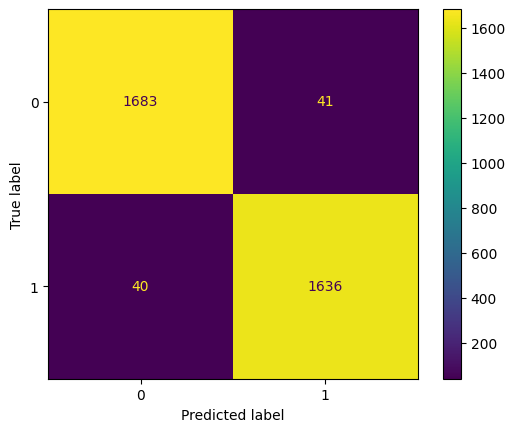

In [65]:
confusion_matrix = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix,display_labels=model.classes_).plot()

## 2/ Accuracy

In [67]:
print(f"Accuracy : {accuracy_score(y_test,y_pred)*100:.2f} %")

Accuracy : 97.62 %


## 3/ Precision

In [68]:
print(f"La précision : {precision_score(y_test,y_pred)*100:.2f} %")

La précision : 97.56 %


# Test and Evaluation with cross validation

In [70]:
cross_val_prec = cross_val_score(model, X, y, cv=10, scoring='precision')

In [71]:
cross_val_acc = cross_val_score(model, X, y,cv=10, scoring='accuracy')

In [72]:
i=0
for score in cross_val_acc:
    i=i+1
    print(f"fold {i} :{score*100:.2f} %")

fold 1 :88.76 %
fold 2 :84.24 %
fold 3 :97.00 %
fold 4 :97.88 %
fold 5 :99.12 %
fold 6 :99.88 %
fold 7 :99.88 %
fold 8 :99.94 %
fold 9 :97.24 %
fold 10 :96.29 %


In [73]:
moyen = cross_val_acc.mean()
print(f"la moyenne est : {moyen*100:.2f} %")

la moyenne est : 96.02 %


In [75]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1723
           1       0.98      0.98      0.98      1677

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400



# What are the important features that makes a client churn or stay ?

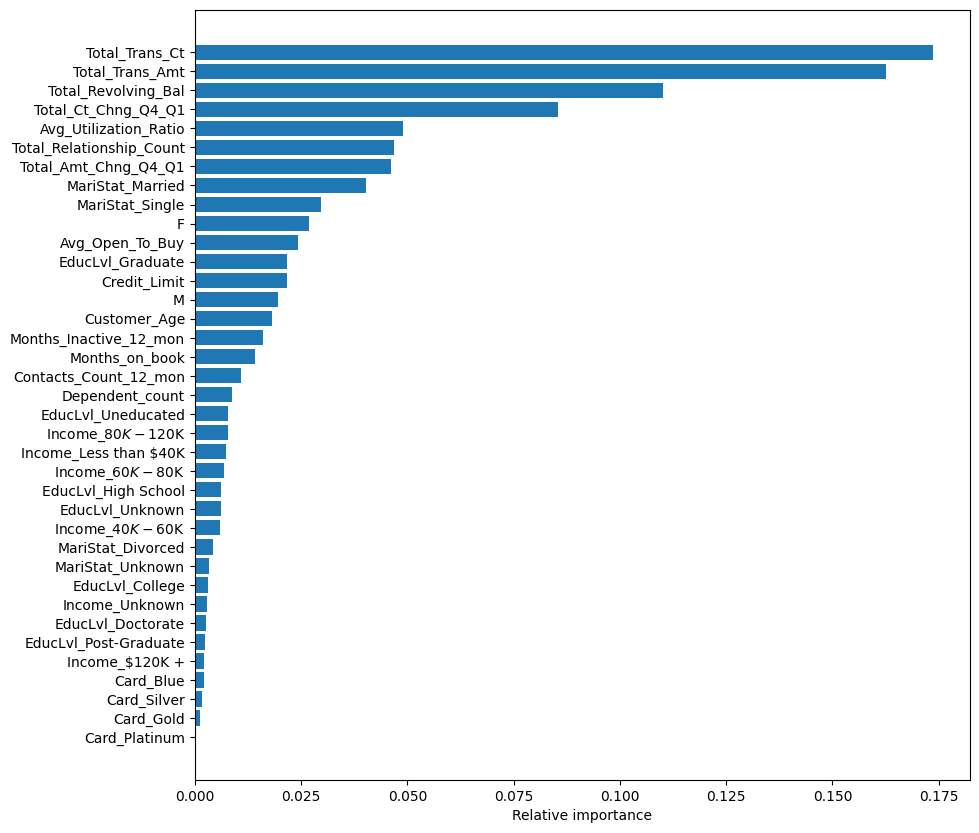

In [76]:
plt.figure(figsize=(10, 10))
important_features = model.feature_importances_
features = X.columns
indices = np.argsort(important_features)

plt.barh(range(len(indices)),important_features[indices])
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

# Bringing the model to existing

In [5]:
#pickle.dump(model, open('model/model.pkl', 'wb'))

In [8]:
model_file = pickle.load(open('model/model.pkl', 'rb'))

In [79]:
X_test.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'F',
       'M', 'EducLvl_College', 'EducLvl_Doctorate', 'EducLvl_Graduate',
       'EducLvl_High School', 'EducLvl_Post-Graduate', 'EducLvl_Uneducated',
       'EducLvl_Unknown', 'MariStat_Divorced', 'MariStat_Married',
       'MariStat_Single', 'MariStat_Unknown', 'Card_Blue', 'Card_Gold',
       'Card_Platinum', 'Card_Silver', 'Income_$120K +', 'Income_$40K - $60K',
       'Income_$60K - $80K', 'Income_$80K - $120K', 'Income_Less than $40K',
       'Income_Unknown'],
      dtype='object')

In [80]:
X_test.head(1)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Card_Blue,Card_Gold,Card_Platinum,Card_Silver,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Income_Unknown
10941,42,2,37,1,2,2,34516.0,0,34516.0,0.443081,...,0.887425,0.0,0.0,0.112575,1.0,0.0,0.0,0.0,0.0,0.0


In [81]:
X_test.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'F',
       'M', 'EducLvl_College', 'EducLvl_Doctorate', 'EducLvl_Graduate',
       'EducLvl_High School', 'EducLvl_Post-Graduate', 'EducLvl_Uneducated',
       'EducLvl_Unknown', 'MariStat_Divorced', 'MariStat_Married',
       'MariStat_Single', 'MariStat_Unknown', 'Card_Blue', 'Card_Gold',
       'Card_Platinum', 'Card_Silver', 'Income_$120K +', 'Income_$40K - $60K',
       'Income_$60K - $80K', 'Income_$80K - $120K', 'Income_Less than $40K',
       'Income_Unknown'],
      dtype='object')

In [82]:
# testing how data should
datas = {
    'Customer_Age':40, 'Dependent_count':0, 'Months_on_book':0,
       'Total_Relationship_Count':0, 'Months_Inactive_12_mon':0,
       'Contacts_Count_12_mon':0, 'Credit_Limit':0, 'Total_Revolving_Bal':0,
       'Avg_Open_To_Buy':0, 'Total_Amt_Chng_Q4_Q1':0, 'Total_Trans_Amt':0,
       'Total_Trans_Ct':0, 'Total_Ct_Chng_Q4_Q1':0, 'Avg_Utilization_Ratio':0, 'F':0,
       'M':0, 'EducLvl_College':0, 'EducLvl_Doctorate':0, 'EducLvl_Graduate':0,
       'EducLvl_High School':0, 'EducLvl_Post-Graduate':0, 'EducLvl_Uneducated':0,
       'EducLvl_Unknown':0, 'MariStat_Divorced':0, 'MariStat_Married':0,
       'MariStat_Single':0, 'MariStat_Unknown':0, 'Card_Blue':0, 'Card_Gold':0,
       'Card_Platinum':0, 'Card_Silver':0, 'Income_$120K +':0, 'Income_$40K - $60K':0,
       'Income_$60K - $80K':0, 'Income_$80K - $120K':0, 'Income_Less than $40K':0,
       'Income_Unknown':0
       }

In [83]:
new_data1 = pd.DataFrame([datas], index=[0])

In [84]:
new_data1

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Card_Blue,Card_Gold,Card_Platinum,Card_Silver,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Income_Unknown
0,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
y_pred = model.predict(new_data1)

In [86]:
y_pred

array([0], dtype=int64)

In [87]:
data2 = pd.read_csv("data/credit_card_churn.csv")

In [88]:
data2['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

# Feature Evaluation

### What will happen if i drop the columns who have the same ammount of information ? 
### like : Total_Trans_Amt == Total_Trans_Ct

In [89]:
data_work # the original preprocessed data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [90]:
data_work.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [93]:
X.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'F',
       'M', 'EducLvl_College', 'EducLvl_Doctorate', 'EducLvl_Graduate',
       'EducLvl_High School', 'EducLvl_Post-Graduate', 'EducLvl_Uneducated',
       'EducLvl_Unknown', 'MariStat_Divorced', 'MariStat_Married',
       'MariStat_Single', 'MariStat_Unknown', 'Card_Blue', 'Card_Gold',
       'Card_Platinum', 'Card_Silver', 'Income_$120K +', 'Income_$40K - $60K',
       'Income_$60K - $80K', 'Income_$80K - $120K', 'Income_Less than $40K',
       'Income_Unknown'],
      dtype='object')

In [124]:
X_new = X.drop(columns=['Total_Trans_Amt','Total_Amt_Chng_Q4_Q1','Avg_Open_To_Buy','Months_on_book','Dependent_count','Customer_Age']) 
## avg_open_to_buy, Months_on_book' and 'Dependent_count' and Customer_Age is less correlated with attrition
## 'Total_Trans_Amt','Total_Amt_Chng_Q4_Q1' have the same information like Total_Ct_Chng_Q4_Q1 Total_Trans_Ct

Total_Trans_Amt == Total_Trans_Ct
Total_Amt_Chng_Q4_Q1 == Total_Ct_Chng_Q4_Q1

In [125]:
model2 = RandomForestClassifier(n_estimators=40,criterion='gini')

In [126]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new,y,test_size=0.2,random_state=42)

In [127]:
model2.fit(X_train_new,y_train_new)

RandomForestClassifier(n_estimators=40)

In [128]:
y_pred_new = model2.predict(X_test_new)

In [129]:
print(f"Accuracy : {accuracy_score(y_test_new,y_pred_new)*100:.2f} %")

Accuracy : 95.44 %


In [130]:
print(f"La précision : {precision_score(y_test_new,y_pred_new)*100:.2f} %")

La précision : 94.24 %


In [131]:
cross_val_acc_new = cross_val_score(model2, X_new, y,cv=10, scoring='accuracy')

In [132]:
i=0
for score in cross_val_acc_new:
    i=i+1
    print(f"fold {i} :{score*100:.2f} %")

fold 1 :85.29 %
fold 2 :73.53 %
fold 3 :95.76 %
fold 4 :97.47 %
fold 5 :99.47 %
fold 6 :99.65 %
fold 7 :99.59 %
fold 8 :99.59 %
fold 9 :97.12 %
fold 10 :99.76 %


## correlation between churn and predict and the other variables 

In [123]:
data_work.corr()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,-0.018203,-0.018991,-0.013687,0.150005,-0.152449,-0.204491,0.023873,0.263053,0.000285,0.131063,0.168598,0.371403,0.290054,0.178410
Customer_Age,-0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,-0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,-0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.000285,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


### i droped Avg_Open_To_Buy,Dependent_count , Months_on_book, Customer_Age ( because its less correlated with attrition flag ) from the data and not much changed , it get the model better ( check line 105 )

In [133]:
datafi = pd.concat([X_new, y], axis=1)

In [134]:
datafi

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,F,M,...,Card_Gold,Card_Platinum,Card_Silver,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Income_Unknown,Attrition_Flag
0,5,1,3,12691.000000,777,42,1.625000,0.061000,0.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1
1,6,1,2,8256.000000,864,33,3.714000,0.105000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1
2,4,1,0,3418.000000,0,20,2.333000,0.000000,0.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1
3,3,4,1,3313.000000,2517,20,2.333000,0.760000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1
4,5,1,0,4716.000000,0,28,2.500000,0.000000,0.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,2,1,1,34516.000000,785,72,0.690492,0.022695,0.000000,1.000000,...,0.0,0.0,1.000000,0.694908,0.000000,0.000000,0.305092,0.000000,0.0,0
16996,5,1,3,15021.924847,0,58,0.437420,0.000000,0.000000,1.000000,...,0.0,0.0,0.058523,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0
16997,2,3,3,3839.306772,1475,46,0.586867,0.384958,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0
16998,1,2,3,4892.560620,126,61,0.677278,0.025489,0.203475,0.796525,...,0.0,0.0,0.000000,0.000000,0.000000,0.796525,0.000000,0.203475,0.0,0


In [140]:
datafi.corr()[['EducLvl_College', 'EducLvl_Doctorate', 'EducLvl_Graduate',
       'EducLvl_High School', 'EducLvl_Post-Graduate', 'EducLvl_Uneducated',
       'EducLvl_Unknown', 'MariStat_Divorced', 'MariStat_Married',
       'MariStat_Single', 'MariStat_Unknown']]

,EducLvl_College,EducLvl_Doctorate,EducLvl_Graduate,EducLvl_High School,EducLvl_Post-Graduate,EducLvl_Uneducated,EducLvl_Unknown,MariStat_Divorced,MariStat_Married,MariStat_Single,MariStat_Unknown
Total_Relationship_Count,-0.007861,-0.018508,0.023941,0.000130,0.003887,0.003943,-0.019110,0.007256,0.025528,-0.024362,-0.010335
Months_Inactive_12_mon,-0.005730,0.004966,0.005342,-0.002153,-0.003049,0.011502,-0.012061,0.009860,-0.008376,0.004213,-0.001722
Contacts_Count_12_mon,-0.004418,0.009002,0.007350,-0.015336,-0.012826,0.010944,0.002925,0.004698,-0.002052,0.006504,-0.012767
Credit_Limit,0.005950,-0.025199,-0.010032,0.012707,0.009878,0.019711,-0.016000,0.033881,-0.070608,0.038139,0.029254
Total_Revolving_Bal,-0.007289,-0.015224,-0.004095,0.010351,0.019235,0.011714,-0.014091,0.001589,0.028365,-0.020979,-0.016325
Total_Trans_Ct,-0.003933,-0.035006,0.006171,0.003698,0.007223,0.014380,-0.005722,0.020007,-0.098636,0.080843,0.017007
Total_Ct_Chng_Q4_Q1,-0.010181,-0.044783,-0.002514,0.019225,-0.006157,0.028441,-0.006005,-0.014497,0.008415,-0.000520,-0.000583
Avg_Utilization_Ratio,-0.006102,0.002624,-0.002523,-0.003423,0.008540,0.015935,-0.010343,-0.024066,0.044230,-0.017945,-0.026485
F,-0.018219,0.040254,0.018430,-0.022062,-0.023889,-0.006322,0.012153,-0.004473,0.005687,0.007466,-0.020070
M,0.018219,-0.040254,-0.018430,0.022062,0.023889,0.006322,-0.012153,0.004473,-0.005687,-0.007466,0.020070


In [254]:
datafi.columns

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'F',
       'M', 'EducLvl_College', 'EducLvl_Doctorate', 'EducLvl_Graduate',
       'EducLvl_High School', 'EducLvl_Post-Graduate', 'EducLvl_Uneducated',
       'EducLvl_Unknown', 'MariStat_Divorced', 'MariStat_Married',
       'MariStat_Single', 'MariStat_Unknown', 'Card_Blue', 'Card_Gold',
       'Card_Platinum', 'Card_Silver', 'Income_$120K +', 'Income_$40K - $60K',
       'Income_$60K - $80K', 'Income_$80K - $120K', 'Income_Less than $40K',
       'Income_Unknown', 'Attrition_Flag'],
      dtype='object')

In [143]:
X_new2 = datafi.drop(columns=['Attrition_Flag','Months_Inactive_12_mon','Credit_Limit','F','M','Card_Blue','Card_Gold','Card_Platinum','Card_Silver'
                              ,'Income_$120K +','Income_$40K - $60K','Income_$60K - $80K','Income_$80K - $120K','Income_Less than $40K'
                             ,'Income_Unknown','EducLvl_College','EducLvl_Doctorate', 'EducLvl_Graduate','EducLvl_High School', 
                              'EducLvl_Post-Graduate', 'EducLvl_Uneducated','EducLvl_Unknown','MariStat_Divorced', 'MariStat_Married','MariStat_Single', 'MariStat_Unknown']) 

In [144]:
X_new2

,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,5,3,777,42,1.625000,0.061000
1,6,2,864,33,3.714000,0.105000
2,4,0,0,20,2.333000,0.000000
3,3,1,2517,20,2.333000,0.760000
4,5,0,0,28,2.500000,0.000000
...,...,...,...,...,...,...
16995,2,1,785,72,0.690492,0.022695
16996,5,3,0,58,0.437420,0.000000
16997,2,3,1475,46,0.586867,0.384958
16998,1,3,126,61,0.677278,0.025489


In [145]:
model2 = RandomForestClassifier(n_estimators=40,criterion='gini')

In [146]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new2,y,test_size=0.2,random_state=42)

In [147]:
model2.fit(X_train_new,y_train_new)

RandomForestClassifier(n_estimators=40)

In [148]:
y_pred_new = model2.predict(X_test_new)

In [149]:
print(f"Accuracy : {accuracy_score(y_test_new,y_pred_new)*100:.2f} %")

Accuracy : 91.44 %


In [150]:
print(f"La précision : {precision_score(y_test_new,y_pred_new)*100:.2f} %")

La précision : 91.24 %


In [183]:
cross_val_acc_new = cross_val_score(model2, X_new2, y,cv=10, scoring='accuracy')

In [184]:
i=0
for score in cross_val_acc_new:
    i=i+1
    print(f"fold {i} :{score*100:.2f} %")

fold 1 :81.88 %
fold 2 :75.94 %
fold 3 :87.53 %
fold 4 :92.41 %
fold 5 :93.88 %
fold 6 :95.47 %
fold 7 :95.82 %
fold 8 :94.76 %
fold 9 :88.71 %
fold 10 :96.82 %


### So after dropping all less correlated columns the accuracy didn't drop that much ( 96% -> 91 % ) 91% is still a reasonable accuracy with just 6 columns ( 32 columns for 96% accuracy )

In [153]:
#pickle.dump(model2, open('model/model.pkl', 'wb'))

In [154]:
model2_file = pickle.load(open('model/model.pkl', 'rb'))

In [156]:
X_new2.columns

Index(['Total_Relationship_Count', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [178]:
# testing how data should
data_mod2 = {
    'Total_Relationship_Count':20, 'Contacts_Count_12_mon':20, 'Total_Revolving_Bal':20,
       'Total_Trans_Ct':20, 'Total_Ct_Chng_Q4_Q1':20,
       'Avg_Utilization_Ratio':20}

In [179]:
new_data2 = pd.DataFrame([data_mod2], index=[0])

In [180]:
y_pred_mod2 = model2_file.predict(new_data2)

In [181]:
y_pred_mod2

array([0], dtype=int64)

In [182]:
X_new2

,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,5,3,777,42,1.625000,0.061000
1,6,2,864,33,3.714000,0.105000
2,4,0,0,20,2.333000,0.000000
3,3,1,2517,20,2.333000,0.760000
4,5,0,0,28,2.500000,0.000000
...,...,...,...,...,...,...
16995,2,1,785,72,0.690492,0.022695
16996,5,3,0,58,0.437420,0.000000
16997,2,3,1475,46,0.586867,0.384958
16998,1,3,126,61,0.677278,0.025489


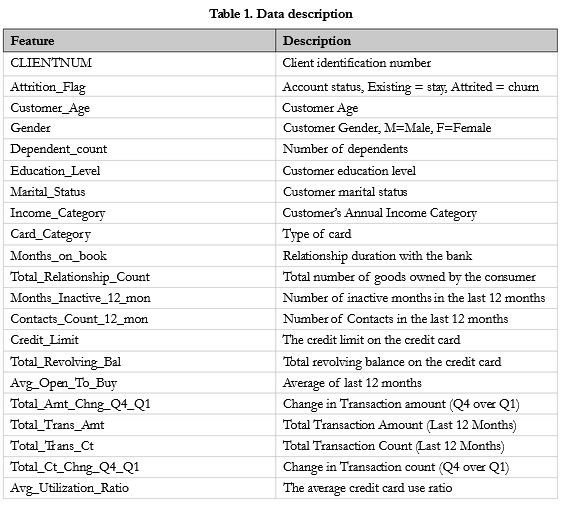

### Using just those features for the model :
Total_Relationship_Count : Total number of goods owned by the consumer <br>
Contacts_Count_12_mon : number of contacts in the last 12 months <br>
Total_Revolving_Bal : 	total revolving balance on the credit card <br>
Total_Trans_Ct : total transaction count ( last 12 months ) <br>
Total_Ct_Chng_Q4_Q1 : change in transaction count ( Q4 over Q1 ) <br>
Avg_Utilization_Ratio : The average credit card use ratio <br>
# That gives 91% accuracy

### I will try to drop one of those columns to see if accuracy change or not 

In [258]:
datafi

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,F,M,...,Card_Gold,Card_Platinum,Card_Silver,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Income_Unknown,Attrition_Flag
0,5,1,3,12691.000000,777,42,1.625000,0.061000,0.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1
1,6,1,2,8256.000000,864,33,3.714000,0.105000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1
2,4,1,0,3418.000000,0,20,2.333000,0.000000,0.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1
3,3,4,1,3313.000000,2517,20,2.333000,0.760000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1
4,5,1,0,4716.000000,0,28,2.500000,0.000000,0.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,2,1,1,34516.000000,785,72,0.690492,0.022695,0.000000,1.000000,...,0.0,0.0,1.000000,0.694908,0.000000,0.000000,0.305092,0.000000,0.0,0
16996,5,1,3,15021.924847,0,58,0.437420,0.000000,0.000000,1.000000,...,0.0,0.0,0.058523,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0
16997,2,3,3,3839.306772,1475,46,0.586867,0.384958,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0
16998,1,2,3,4892.560620,126,61,0.677278,0.025489,0.203475,0.796525,...,0.0,0.0,0.000000,0.000000,0.000000,0.796525,0.000000,0.203475,0.0,0


In [255]:
datafi[['MariStat_Divorced', 'MariStat_Married','MariStat_Single', 'MariStat_Unknown']].head(1)

,MariStat_Divorced,MariStat_Married,MariStat_Single,MariStat_Unknown
0,0.0,1.0,0.0,0.0


In [144]:
X_new2

,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,5,3,777,42,1.625000,0.061000
1,6,2,864,33,3.714000,0.105000
2,4,0,0,20,2.333000,0.000000
3,3,1,2517,20,2.333000,0.760000
4,5,0,0,28,2.500000,0.000000
...,...,...,...,...,...,...
16995,2,1,785,72,0.690492,0.022695
16996,5,3,0,58,0.437420,0.000000
16997,2,3,1475,46,0.586867,0.384958
16998,1,3,126,61,0.677278,0.025489


In [267]:
add=datafi[['MariStat_Divorced', 'MariStat_Married','MariStat_Single', 'MariStat_Unknown','Credit_Limit']]
X_new3=pd.concat([X_new2, add], axis=1)

In [268]:
X_new3

,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,MariStat_Divorced,MariStat_Married,MariStat_Single,MariStat_Unknown,Credit_Limit
0,5,3,777,42,1.625000,0.061000,0.000000,1.000000,0.000000,0.0,12691.000000
1,6,2,864,33,3.714000,0.105000,0.000000,0.000000,1.000000,0.0,8256.000000
2,4,0,0,20,2.333000,0.000000,0.000000,1.000000,0.000000,0.0,3418.000000
3,3,1,2517,20,2.333000,0.760000,0.000000,0.000000,0.000000,1.0,3313.000000
4,5,0,0,28,2.500000,0.000000,0.000000,1.000000,0.000000,0.0,4716.000000
...,...,...,...,...,...,...,...,...,...,...,...
16995,2,1,785,72,0.690492,0.022695,0.000000,1.000000,0.000000,0.0,34516.000000
16996,5,3,0,58,0.437420,0.000000,0.000000,0.941477,0.058523,0.0,15021.924847
16997,2,3,1475,46,0.586867,0.384958,0.488948,0.511052,0.000000,0.0,3839.306772
16998,1,3,126,61,0.677278,0.025489,0.000000,1.000000,0.000000,0.0,4892.560620


In [269]:
model3 = RandomForestClassifier(n_estimators=40,criterion='gini')

In [270]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new3,y,test_size=0.2,random_state=42)

In [271]:
model3.fit(X_train_new,y_train_new)

RandomForestClassifier(n_estimators=40)

In [272]:
y_pred_new = model3.predict(X_test_new)

In [294]:
X_test_new[0:1]

,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,MariStat_Divorced,MariStat_Married,MariStat_Single,MariStat_Unknown,Credit_Limit
10941,1,2,0,55,0.278223,0.0,0.0,0.887425,0.112575,0.0,34516.0


In [273]:
print(f"Accuracy : {accuracy_score(y_test_new,y_pred_new)*100:.2f} %")

Accuracy : 94.47 %


In [274]:
print(f"La précision : {precision_score(y_test_new,y_pred_new)*100:.2f} %")

La précision : 94.23 %


In [275]:
cross_val_acc_new = cross_val_score(model3, X_new3, y,cv=10, scoring='accuracy')

In [276]:
i=0
for score in cross_val_acc_new:
    i=i+1
    print(f"fold {i} :{score*100:.2f} %")

fold 1 :84.59 %
fold 2 :77.00 %
fold 3 :92.88 %
fold 4 :95.82 %
fold 5 :98.00 %
fold 6 :98.53 %
fold 7 :98.59 %
fold 8 :98.29 %
fold 9 :94.12 %
fold 10 :98.94 %


### Using just those features for the model :
Total_Relationship_Count : Total number of goods owned by the consumer <br>
Contacts_Count_12_mon : number of contacts in the last 12 months <br>
Total_Revolving_Bal : 	total revolving balance on the credit card <br>
Total_Trans_Ct : total transaction count ( last 12 months ) <br>
Total_Ct_Chng_Q4_Q1 : change in transaction count ( Q4 over Q1 ) <br>
Avg_Utilization_Ratio : The average credit card use ratio <br>
Credit_Limit : The  credit limit on the credit card<br>
Marital_Status : Customer marital status <br>
# That gives 94% accuracy

In [278]:
X_new3['Total_Relationship_Count'].unique()

array([5, 6, 4, 3, 2, 1], dtype=int64)

# Model deployment

In [279]:
#pickle.dump(model3, open('model/model_final.pkl', 'wb'))

In [285]:
X_new3[X_new3['Credit_Limit']<0]

,Total_Relationship_Count,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,MariStat_Divorced,MariStat_Married,MariStat_Single,MariStat_Unknown,Credit_Limit


In [286]:
X_new3.columns

Index(['Total_Relationship_Count', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'MariStat_Divorced', 'MariStat_Married',
       'MariStat_Single', 'MariStat_Unknown', 'Credit_Limit'],
      dtype='object')

In [298]:
data_mod3 = {
    'Total_Relationship_Count':20, 'Contacts_Count_12_mon':20, 'Total_Revolving_Bal':20,
       'Total_Trans_Ct':20, 'Total_Ct_Chng_Q4_Q1':20,
       'Avg_Utilization_Ratio':20, 'MariStat_Divorced':1, 'MariStat_Married':0,
       'MariStat_Single':0, 'MariStat_Unknown':0, 'Credit_Limit':20}

In [299]:
data_mod3 = pd.DataFrame([data_mod3], index=[0])

In [300]:
model3.predict(data_mod3)

array([0], dtype=int64)